<a href="https://colab.research.google.com/github/Shreyabaral/SocialMediaAnalytics/blob/main/Topic_Modelling_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install praw
!pip install pandas nltk gensim pyLDAvis

import praw
import random
import csv

import pandas as pd

!pip install plotly
!pip install wordcloud

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


from wordcloud import WordCloud

import re
import string
import ast

#import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl (168 kB)


[nltk_data] Downloading package punkt to /Users/hope/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hope/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hope/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Set up your Reddit instance

client_id = 'pPsx95TX-i0nWFf0_jXygg'
client_secret = 'OSwboGqfZY_-MkgxAjGgGIyjxX_DZA'
user_agent = 'testscript by u/fakebot3'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

def get_random_posts(subreddit_name, num_posts=5000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = list(subreddit.top(limit=5000))  # Adjust this limit as needed
    random_posts = random.sample(posts, min(num_posts, len(posts)))

    return [(post.title, post.url) for post in random_posts]

def save_to_csv(posts, filename='random_reddit_posts.csv'):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Title', 'URL'])  # Header
        writer.writerows(posts)  # Write post data

# Example usage
if __name__ == "__main__":
    subreddit_name = "technology" # You can specify any subreddit
    num_posts = 5000  # Number of random posts to fetch
    random_posts = get_random_posts(subreddit_name, num_posts)
    save_to_csv(random_posts)

    print(f"Saved {num_posts} random posts to random_reddit_posts.csv")

Saved 5000 random posts to random_reddit_posts.csv


In [4]:
df= pd.read_csv('random_reddit_posts.csv')

In [5]:
df.shape

(996, 2)

In [6]:
df

Title  \
0    Twitter is bringing its ‘read before you retwe...   
1    Demanding employees turn on their webcams is a...   
2    Musk bans remote work at Twitter, warns staff ...   
3    The Trump 2020 campaign's cell phone app gathe...   
4    The FCC is preparing to weaken the definition ...   
..                                                 ...   
991  Zuckerberg Hits Users with the Hard Truth: You...   
992  The CEO of cosmetics retailer Lush says he's '...   
993  Silicon Valley needs to stop laying off worker...   
994  White House must now respond to the people ask...   
995  Nine in 10 adults think buying latest smartpho...   

                                                   URL  
0    https://www.theverge.com/2020/9/25/21455635/tw...  
1    https://techcrunch.com/2022/10/09/ixnay-on-the...  
2    https://arstechnica.com/tech-policy/2022/11/mu...  
3    https://apnews.com/article/124d914bb082575aeec...  
4    http://www.dslreports.com/shownews/the-fcc-is-...  
..                                                 ...  
991  https://www.vanityfair.com/news/2018/03/zucker...  
992  https://www.businessinsider.com/lush-ceo-happy...  
993  https://businessinsider.com/fire-blame-ceo-tec...  
994  https://www.dailydot.com/layer8/ajit-pai-resig...  
995  https://www.independent.co.uk/life-style/gadge...  

[996 rows x 2 columns]

In [7]:
df.head()

Title  \
0  Twitter is bringing its ‘read before you retwe...   
1  Demanding employees turn on their webcams is a...   
2  Musk bans remote work at Twitter, warns staff ...   
3  The Trump 2020 campaign's cell phone app gathe...   
4  The FCC is preparing to weaken the definition ...   

                                                 URL  
0  https://www.theverge.com/2020/9/25/21455635/tw...  
1  https://techcrunch.com/2022/10/09/ixnay-on-the...  
2  https://arstechnica.com/tech-policy/2022/11/mu...  
3  https://apnews.com/article/124d914bb082575aeec...  
4  http://www.dslreports.com/shownews/the-fcc-is-...

#Data Cleaning



In [8]:
# Convert text to lowercase
def convert_to_lower_case(text):
  return text.lower()

In [9]:
def remove_punctuation(text):
  # Create a translation table to remove punctuation
  translator = str.maketrans('', '', string.punctuation)

  # Remove punctuation using the translation table
  text_without_punct = text.translate(translator)

  return text_without_punct

In [10]:

def tokenize(text):
  return word_tokenize(text)

In [11]:
# Remove stopwords
def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english'))
  return [word for word in tokens if word not in stop_words]

In [12]:
def lemmatize(tokens):
  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word) if lemmatizer.lemmatize(word) is not None else word for word in tokens]

In [13]:
# Remove special characters and numbers
def remove_special_chars(tokens):
    return [re.sub('[^A-Za-z]+', '', word) for word in tokens]

In [14]:
# Load the data from the CSV file
data = pd.read_csv('random_reddit_posts.csv')

def preprocess(text):
    # Simple preprocessing: lowercasing, removing stopwords, and tokenization
    lower_text = convert_to_lower_case(text) # converting to lowercase
    removed_punctuation = remove_punctuation(lower_text) # removing punctuation
    tokens = tokenize(removed_punctuation) # tokenize words
    tokens = remove_stop_words(tokens) # removing stop words
    tokens = lemmatize(tokens) # lemmatize tokens
    tokens = remove_special_chars(tokens) # remove special characters from token
    return tokens

# Apply function on text column
data['tokens'] = data['Title'].apply(preprocess)


In [15]:
data

Title  \
0    Twitter is bringing its ‘read before you retwe...   
1    Demanding employees turn on their webcams is a...   
2    Musk bans remote work at Twitter, warns staff ...   
3    The Trump 2020 campaign's cell phone app gathe...   
4    The FCC is preparing to weaken the definition ...   
..                                                 ...   
991  Zuckerberg Hits Users with the Hard Truth: You...   
992  The CEO of cosmetics retailer Lush says he's '...   
993  Silicon Valley needs to stop laying off worker...   
994  White House must now respond to the people ask...   
995  Nine in 10 adults think buying latest smartpho...   

                                                   URL  \
0    https://www.theverge.com/2020/9/25/21455635/tw...   
1    https://techcrunch.com/2022/10/09/ixnay-on-the...   
2    https://arstechnica.com/tech-policy/2022/11/mu...   
3    https://apnews.com/article/124d914bb082575aeec...   
4    http://www.dslreports.com/shownews/the-fcc-is-...   
..                                                 ...   
991  https://www.vanityfair.com/news/2018/03/zucker...   
992  https://www.businessinsider.com/lush-ceo-happy...   
993  https://businessinsider.com/fire-blame-ceo-tec...   
994  https://www.dailydot.com/layer8/ajit-pai-resig...   
995  https://www.independent.co.uk/life-style/gadge...   

                                                tokens  
0    [twitter, bringing, , read, retweet, , prompt,...  
1    [demanding, employee, turn, webcam, human, rig...  
2    [musk, ban, remote, work, twitter, warns, staf...  
3    [trump, , campaign, cell, phone, app, gathered...  
4    [fcc, preparing, weaken, definition, broadband...  
..                                                 ...  
991       [zuckerberg, hit, user, hard, truth, agreed]  
992  [ceo, cosmetic, retailer, lush, say, he, happy...  
993  [silicon, valley, need, stop, laying, worker, ...  
994  [white, house, must, respond, people, asking, ...  
995  [nine, , adult, think, buying, latest, smartph...  

[996 rows x 3 columns]

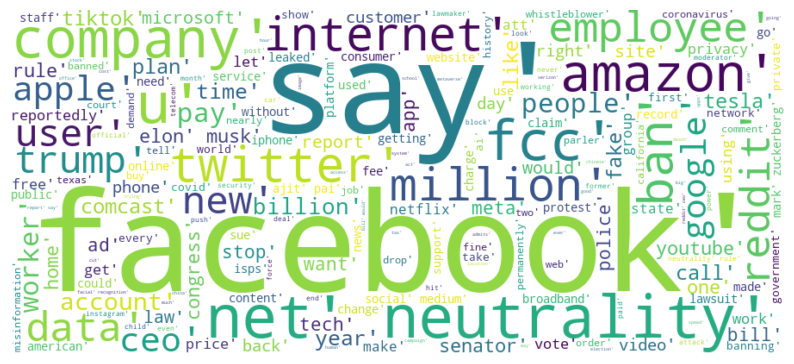

In [16]:
def generate_word_cloud():

    combined_text = ' '.join(data['tokens'].astype(str).tolist())

    # Create a word cloud
    wordcloud = WordCloud(width=900, height=400, background_color='white').generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

generate_word_cloud()

In [17]:
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(data['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in data['tokens']]

# Apply LDA
num_topics = 15# Adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

Topic 0: 0.012*"amazon" + 0.010*"say" + 0.009*"ceo" + 0.008*"" + 0.006*"reddit" + 0.006*"news" + 0.006*"working" + 0.006*"lawmaker" + 0.006*"netflix" + 0.005*"company"
Topic 1: 0.065*"" + 0.013*"twitter" + 0.013*"musk" + 0.013*"elon" + 0.009*"facebook" + 0.007*"year" + 0.006*"report" + 0.006*"internet" + 0.005*"bill" + 0.005*"user"
Topic 2: 0.033*"" + 0.010*"facebook" + 0.008*"employee" + 0.007*"say" + 0.006*"new" + 0.006*"apple" + 0.006*"time" + 0.006*"trump" + 0.006*"google" + 0.006*"use"
Topic 3: 0.012*"" + 0.009*"company" + 0.008*"privacy" + 0.008*"right" + 0.008*"facebook" + 0.007*"say" + 0.007*"state" + 0.006*"website" + 0.006*"report" + 0.006*"user"
Topic 4: 0.034*"" + 0.011*"u" + 0.009*"facebook" + 0.008*"million" + 0.008*"fake" + 0.007*"congress" + 0.007*"reddit" + 0.007*"permanently" + 0.007*"account" + 0.007*"app"
Topic 5: 0.029*"" + 0.017*"facebook" + 0.011*"bill" + 0.007*"congress" + 0.007*"senator" + 0.006*"internet" + 0.006*"reportedly" + 0.006*"privacy" + 0.005*"vote" +

/Users/hope/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/hope/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/hope/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/hope/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/hope/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires ver

In [18]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.075868  0.045975       1        1  9.958656
12    -0.103681 -0.019218       2        1  8.777135
11    -0.174329 -0.089296       3        1  8.467388
7      0.027167  0.060001       4        1  8.462301
1      0.020240  0.072139       5        1  7.695178
13    -0.078743  0.049539       6        1  7.568301
10     0.058040  0.045486       7        1  6.736826
6     -0.014716  0.103445       8        1  6.086622
2      0.038234  0.016910       9        1  5.979931
3      0.030523 -0.082188      10        1  5.883520
4      0.026807 -0.005363      11        1  5.483492
9      0.072693 -0.016781      12        1  5.327000
14     0.073442 -0.052727      13        1  4.774786
5      0.034148 -0.036608      14        1  4.581145
0      0.066041 -0.091313      15        1  4.217720, topic_info=           Term        Freq       Total Category  logprob  loglift
271  neutrality   73.000000   73.000000  Default  30.0000  30.0000
270         net   72.000000   72.000000  Default  29.0000  29.0000
0                512.000000  512.000000  Default  28.0000  28.0000
46          fcc   65.000000   65.000000  Default  27.0000  27.0000
5       twitter   42.000000   42.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
107      report    1.817307   22.732570  Topic15  -5.5482   0.6394
828        call    1.428102   19.842296  Topic15  -5.7892   0.5344
25         work    1.427579   17.757262  Topic15  -5.7896   0.6451
481        like    1.426762   21.046727  Topic15  -5.7902   0.4745
149  subreddits    1.426713    6.783057  Topic15  -5.7902   1.6068

[1136 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.167706            
0         2  0.087753            
0         3  0.078003            
0         4  0.089703            
0         5  0.109204            
...     ...       ...         ...
805       5  0.065084  zuckerberg
805       7  0.130168  zuckerberg
805       9  0.065084  zuckerberg
805      11  0.065084  zuckerberg
805      14  0.130168  zuckerberg

[2474 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 13, 12, 8, 2, 14, 11, 7, 3, 4, 5, 10, 15, 6, 1])

In [19]:
import plotly.express as px
import pandas as pd

# Function to get related posts
def display_related_posts(word, data):
    # Filter the DataFrame for related posts
    related_posts = data[data['Title'].str.contains(word, case=False, na=False)]

    # Create a list to hold the URLs
    urls = []
    titles=[]

    # If related posts are found, populate the URLs list
    if not related_posts.empty:
        for _, row in related_posts.iterrows():

            urls.append(row['URL'])
            titles.append(row['Title'])
    else:
        print(f"No related posts found for '{word}'.")

    return urls,titles # Return the list of URLs

# Function to create the interactive word cloud
def create_interactive_word_cloud(lda_model, df):
    words = []
    for idx in range(lda_model.num_topics):
        topic_terms = lda_model.get_topic_terms(idx, topn=30)
        for word_id, prob in topic_terms:
            words.append((dictionary[word_id], prob))

    # Create a DataFrame for the words and their strengths
    df1 = pd.DataFrame(words, columns=['word', 'strength'])
    # Populate related URLs in df1 based on the word and using df
    df1['related_urls'] = df1['word'].apply(lambda x: display_related_posts(x, df)[0])
    df1['titles'] = df1['word'].apply(lambda x: display_related_posts(x, df)[1])
    # Format URLs for hover display
    df1['formatted'] = df1['titles'].apply(lambda title: "<br>".join(title) if title else "No related posts")

    # Create a scatter plot using df1
    fig = px.scatter(
        df1,
        x='word',
        y='strength',
        size='strength',
        hover_name='word',
        hover_data={'formatted': True},  # Show formatted URLs on hover
        title='Interactive Word Cloud'
    )

    # Update the hover template to display URLs nicely
    fig.update_traces(marker=dict(opacity=0.8, line=dict(width=2, color='White')),
        selector=dict(mode='markers'),
        hovertemplate='<b>%{hovertext}</b><br>Related URLs:<br>%{customdata}<extra></extra>',
        hovertext=df1['word'],
        customdata=df1['formatted'],

    )

    # Show the plot
    fig.show()

# Call the function with lda_model and df
create_interactive_word_cloud(lda_model, df)



No related posts found for 'didnt'.
No related posts found for 'didnt'.


In [20]:
text_input = input("Enter a word to find related posts: ")
display_related_posts(text_input, df)


(['https://www.nytimes.com/2020/07/10/opinion/facebook-cancer-ads.html',
  'https://slate.com/news-and-politics/2018/07/facebook-says-infowars-valid-opinion-and-analysis-but-what-about-the-martian-slave-colony.html?via=recirc_recent',
  'https://qz.com/1599218/millions-of-instagram-users-had-their-passwords-exposed/',
  'https://news.sky.com/story/facebook-responsible-for-94-of-69-million-child-sex-abuse-images-reported-by-us-tech-firms-12101357',
  'https://www.salon.com/2020/08/20/facebook-is-a-global-threat-to-public-health-avaaz-report-says/',
  'https://www.businessinsider.com/meta-russia-linked-hacking-group-fake-footage-ukraine-surrender-2022-2',
  'https://www.businessinsider.com/facebook-sheryl-sandberg-courts-religious-groups-monetization-tools-2021-7',
  'https://www.vanityfair.com/news/2020/12/with-the-election-over-facebook-gets-back-to-spreading-misinformation',
  'https://www.economist.com/leaders/2021/10/09/facebook-is-nearing-a-reputational-point-of-no-return',
  'http

[(8, [('', 0.07834127), ('facebook', 0.011480152), ('google', 0.00735102), ('fcc', 0.006810589), ('data', 0.00670373), ('company', 0.0054313433), ('net', 0.0053230748), ('neutrality', 0.005312941), ('million', 0.0049705966), ('people', 0.004938487)]), (5, [('', 0.029372696), ('facebook', 0.016768362), ('bill', 0.011059073), ('congress', 0.0070414534), ('senator', 0.006785763), ('internet', 0.00607049), ('reportedly', 0.0056470498), ('privacy', 0.005635596), ('vote', 0.0050630015), ('zuckerberg', 0.00484904)]), (3, [('', 0.01176231), ('company', 0.009150601), ('privacy', 0.008024125), ('right', 0.007991787), ('facebook', 0.007789256), ('say', 0.0068827965), ('state', 0.0068481667), ('website', 0.005753104), ('report', 0.0057518394), ('user', 0.005667146)]), (0, [('amazon', 0.011899498), ('say', 0.010401302), ('ceo', 0.008857715), ('', 0.0077660605), ('reddit', 0.006404177), ('news', 0.0060162563), ('working', 0.0060155946), ('lawmaker', 0.006010222), ('netflix', 0.0057661766), ('company

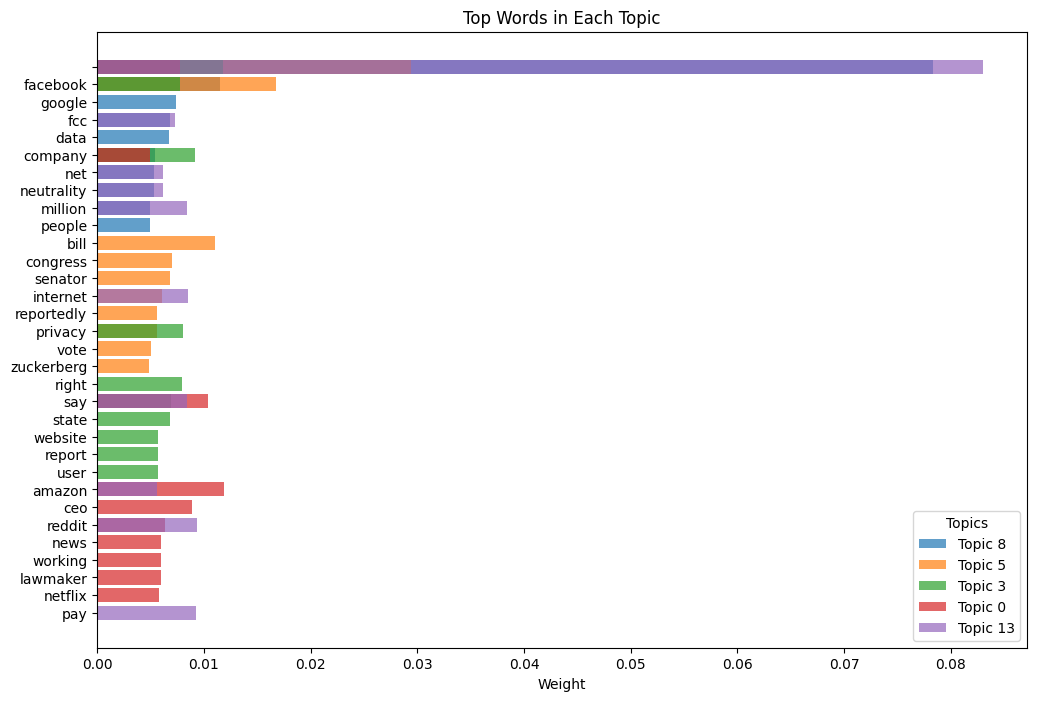

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the top-5 topics based on LDA model
num_top_words = 5
top_topics = lda_model.show_topics(num_topics=5, formatted=False)
print(top_topics)
# Create a DataFrame for visualization
data_for_viz = []
for topic_idx, topic in top_topics:
    for word, weight in topic:
        data_for_viz.append((f'Topic {topic_idx}', word, weight))

# Convert to a DataFrame
df = pd.DataFrame(data_for_viz, columns=['Topic', 'Word', 'Weight'])

# Plot the top words for each topic
plt.figure(figsize=(12, 8))
for topic_idx in df['Topic'].unique():
    topic_data = df[df['Topic'] == topic_idx]
    plt.barh(topic_data['Word'], topic_data['Weight'], label=topic_idx, alpha=0.7)

plt.xlabel('Weight')
plt.title('Top Words in Each Topic')
plt.legend(title='Topics')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
